In [2]:
from asim.training.models.sim_agent.smart.smart import SMART
from asim.training.models.sim_agent.smart.smart_config import SMARTConfig

from asim.common.visualization.color.color import TAB_10

import torch

import matplotlib.pyplot as plt
import numpy as np

In [3]:


config = SMARTConfig()
smart_model = SMART(config)
smart_model

SMART(
  (token_processor): TokenProcessor()
  (encoder): SMARTDecoder(
    (map_encoder): SMARTMapDecoder(
      (type_pt_emb): Embedding(10, 128)
      (polygon_type_emb): Embedding(4, 128)
      (light_pl_emb): Embedding(5, 128)
      (r_pt2pt_emb): FourierEmbedding(
        (freqs): Embedding(3, 64)
        (mlps): ModuleList(
          (0-2): 3 x Sequential(
            (0): Linear(in_features=129, out_features=128, bias=True)
            (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (2): ReLU(inplace=True)
            (3): Linear(in_features=128, out_features=128, bias=True)
          )
        )
        (to_out): Sequential(
          (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=128, out_features=128, bias=True)
        )
      )
      (pt2pt_layers): ModuleList(
        (0-2): 3 x AttentionLayer()
      )
      (token_emb): MLPEmbedding(
        (mlp): Sequential(
        

In [4]:
from pathlib import Path
import pickle

training_path = Path("/home/daniel/waymo_training_catk/training")
pickle_paths = list(training_path.iterdir())

idx = 1

with open(pickle_paths[idx], "rb") as f:
    data = pickle.load(f)
data


{'map_save': {'traj_pos': tensor([[[ 4060.5671, -1657.9021],
           [ 4060.5889, -1655.4022],
           [ 4060.6101, -1652.9023]],
  
          [[ 4060.6101, -1652.9023],
           [ 4060.6316, -1650.4023],
           [ 4060.6531, -1647.9025]],
  
          [[ 4060.6531, -1647.9025],
           [ 4060.6587, -1645.4026],
           [ 4060.5378, -1642.9061]],
  
          ...,
  
          [[ 4146.0210, -1445.1837],
           [ 4145.2549, -1447.5635],
           [ 4144.4883, -1449.9431]],
  
          [[ 4144.4883, -1449.9431],
           [ 4143.7222, -1452.3228],
           [ 4142.9561, -1454.7025]],
  
          [[ 4142.9561, -1454.7025],
           [ 4142.1899, -1457.0822],
           [ 4141.4233, -1459.4618]]]),
  'traj_theta': tensor([ 1.5619,  1.5624,  1.5621,  ..., -1.8824, -1.8820, -1.8824])},
 'pt_token': {'type': tensor([1, 1, 1,  ..., 9, 9, 9], dtype=torch.uint8),
  'pl_type': tensor([0, 0, 0,  ..., 3, 3, 3], dtype=torch.uint8),
  'light_type': tensor([0, 0, 0,  ..., 0,

In [5]:
for key in data.keys():
    print(f"{key}:")
    try:
        for part_key, part_data  in data[key].items():
            if isinstance(part_data, torch.Tensor):
                print(f"  {part_key}:")
                print(f"    Tensor: shape: {list(part_data.shape)}, dtype: {part_data.dtype}")
            else:
                print(f"  {part_key}: {type(part_data)} - {part_data}")
                print(f"    {type(part_data)} - {part_data}")

    except:
        print(f"    {data[key]}")

map_save:
  traj_pos:
    Tensor: shape: [2393, 3, 2], dtype: torch.float32
  traj_theta:
    Tensor: shape: [2393], dtype: torch.float32
pt_token:
  type:
    Tensor: shape: [2393], dtype: torch.uint8
  pl_type:
    Tensor: shape: [2393], dtype: torch.uint8
  light_type:
    Tensor: shape: [2393], dtype: torch.uint8
  num_nodes: <class 'int'> - 2393
    <class 'int'> - 2393
agent:
  num_nodes: <class 'int'> - 49
    <class 'int'> - 49
  valid_mask:
    Tensor: shape: [49, 91], dtype: torch.bool
  role:
    Tensor: shape: [49, 3], dtype: torch.bool
  id:
    Tensor: shape: [49], dtype: torch.int64
  type:
    Tensor: shape: [49], dtype: torch.uint8
  position:
    Tensor: shape: [49, 91, 3], dtype: torch.float32
  heading:
    Tensor: shape: [49, 91], dtype: torch.float32
  velocity:
    Tensor: shape: [49, 91, 2], dtype: torch.float32
  shape:
    Tensor: shape: [49, 3], dtype: torch.float32
scenario_id:
    272d209df60156f8


In [6]:
"""
map_save:
  traj_pos:
    Tensor: shape: [3013, 3, 2], dtype: torch.float32
  traj_theta:
    Tensor: shape: [3013], dtype: torch.float32
pt_token:
  type:
    Tensor: shape: [3013], dtype: torch.uint8
  pl_type:
    Tensor: shape: [3013], dtype: torch.uint8
  light_type:
    Tensor: shape: [3013], dtype: torch.uint8
  num_nodes: <class 'int'> - 3013
    <class 'int'> - 3013
agent:
  num_nodes: <class 'int'> - 48
    <class 'int'> - 48
  valid_mask:
    Tensor: shape: [48, 91], dtype: torch.bool
  role:
    Tensor: shape: [48, 3], dtype: torch.bool
  id:
    Tensor: shape: [48], dtype: torch.int64
  type:
    Tensor: shape: [48], dtype: torch.uint8
  position:
    Tensor: shape: [48, 91, 3], dtype: torch.float32
  heading:
    Tensor: shape: [48, 91], dtype: torch.float32
  velocity:
    Tensor: shape: [48, 91, 2], dtype: torch.float32
  shape:
    Tensor: shape: [48, 3], dtype: torch.float32
scenario_id:
    5e1ba6c841ae6ccd
"""

"\nmap_save:\n  traj_pos:\n    Tensor: shape: [3013, 3, 2], dtype: torch.float32\n  traj_theta:\n    Tensor: shape: [3013], dtype: torch.float32\npt_token:\n  type:\n    Tensor: shape: [3013], dtype: torch.uint8\n  pl_type:\n    Tensor: shape: [3013], dtype: torch.uint8\n  light_type:\n    Tensor: shape: [3013], dtype: torch.uint8\n  num_nodes: <class 'int'> - 3013\n    <class 'int'> - 3013\nagent:\n  num_nodes: <class 'int'> - 48\n    <class 'int'> - 48\n  valid_mask:\n    Tensor: shape: [48, 91], dtype: torch.bool\n  role:\n    Tensor: shape: [48, 3], dtype: torch.bool\n  id:\n    Tensor: shape: [48], dtype: torch.int64\n  type:\n    Tensor: shape: [48], dtype: torch.uint8\n  position:\n    Tensor: shape: [48, 91, 3], dtype: torch.float32\n  heading:\n    Tensor: shape: [48, 91], dtype: torch.float32\n  velocity:\n    Tensor: shape: [48, 91, 2], dtype: torch.float32\n  shape:\n    Tensor: shape: [48, 3], dtype: torch.float32\nscenario_id:\n    5e1ba6c841ae6ccd\n"

Text(0.5, 1.0, 'map_save/traj_pos')

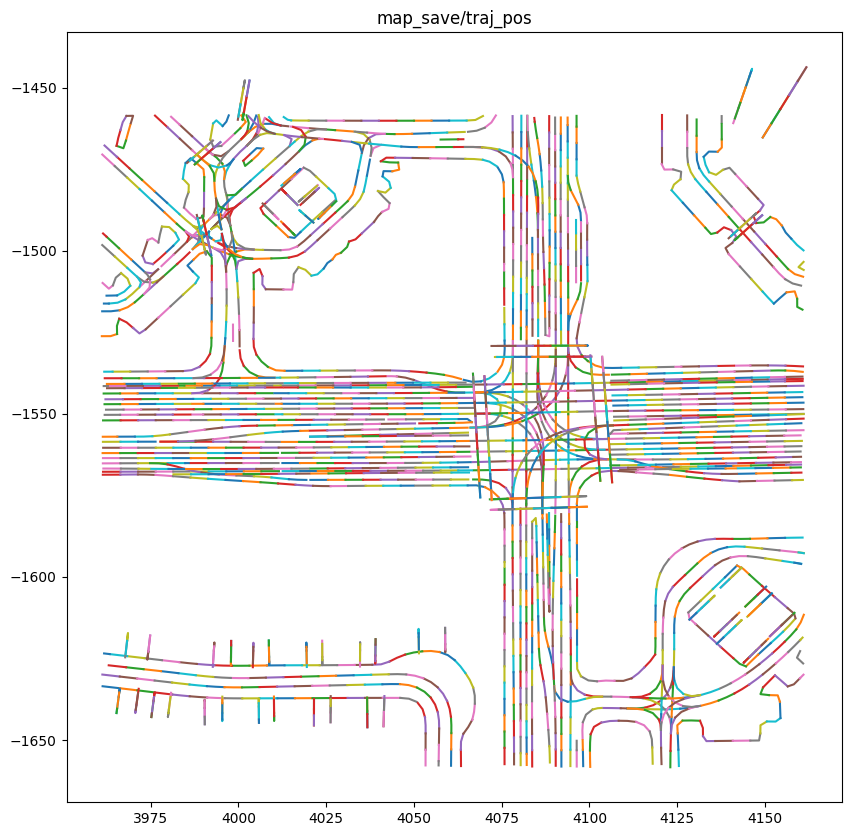

In [13]:

# 1. map_save:
#   traj_pos:
#     Tensor: shape: [3013, 3, 2], dtype: torch.float32
#   traj_theta:
#     Tensor: shape: [3013], dtype: torch.float32



fig, ax = plt.subplots(figsize=(10, 10))

traj_pos = data['map_save']['traj_pos'].numpy()
for i in range(traj_pos.shape[0], ):
    ax.plot(traj_pos[i, :, 0], traj_pos[i, :, 1])

ax.set_title("map_save/traj_pos")


(array([[4.000e+00, 3.800e+01, 1.000e+00, 7.300e+01, 2.000e+00, 8.000e+01,
         8.000e+00, 9.000e+01, 1.700e+01, 2.080e+03],
        [2.000e+00, 4.000e+00, 3.900e+01, 3.700e+01, 4.600e+01, 4.800e+01,
         5.200e+01, 5.300e+01, 6.300e+01, 2.049e+03]]),
 array([0.0046643 , 0.25424555, 0.5038268 , 0.75340807, 1.00298929,
        1.25257063, 1.50215185, 1.75173318, 2.0013144 , 2.2508955 ,
        2.50047684]),
 <a list of 2 BarContainer objects>)

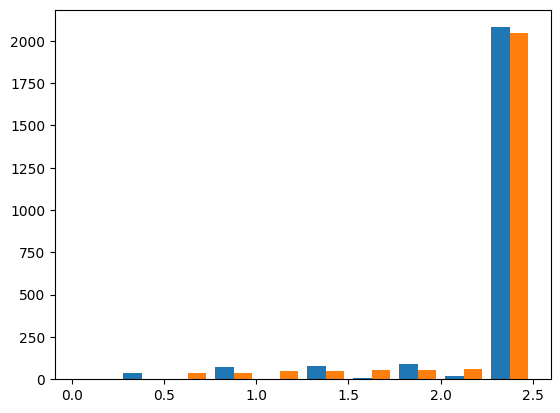

In [15]:
distance = np.linalg.norm(traj_pos[:, :-1] - traj_pos[:, 1:], axis=-1)

# min_x, min_y = np.min(traj_pos[:, :, 0]), np.min(traj_pos[:, :, 1])
# max_x, max_y = np.max(traj_pos[:, :, 0]), np.max(traj_pos[:, :, 1])
# print(np.abs(min_y-max_y), np.abs(min_x-max_x))


plt.hist(distance)

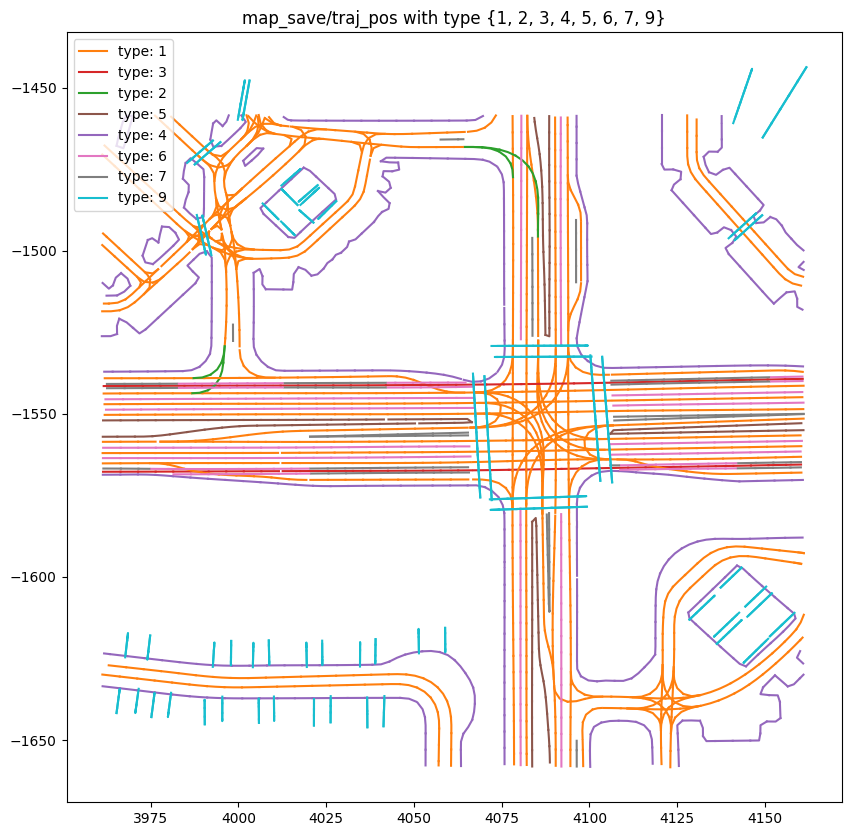

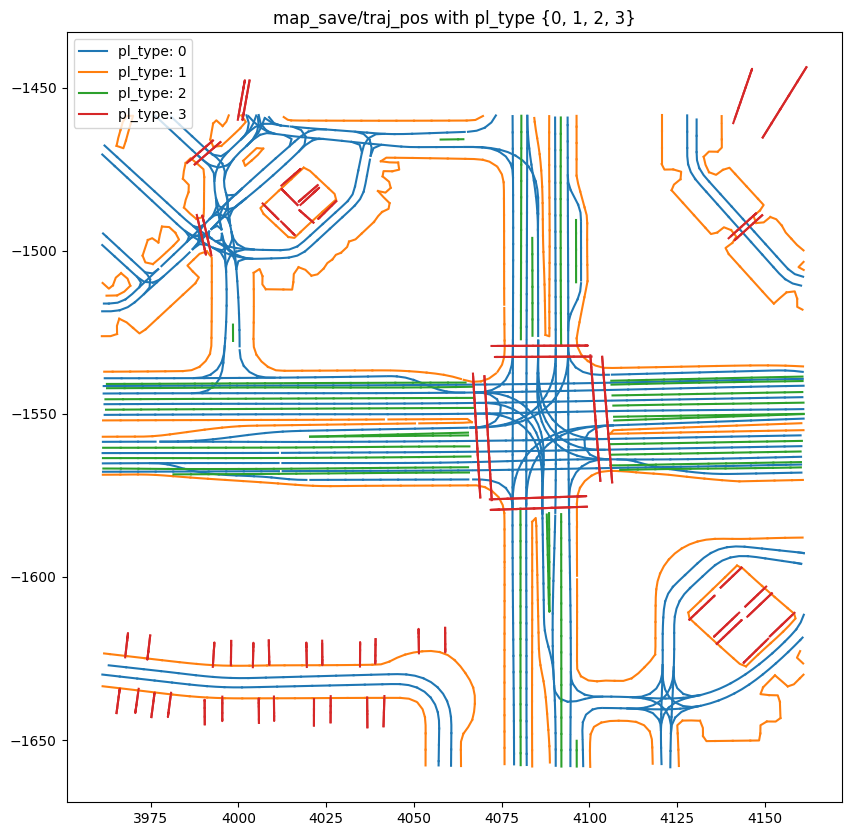

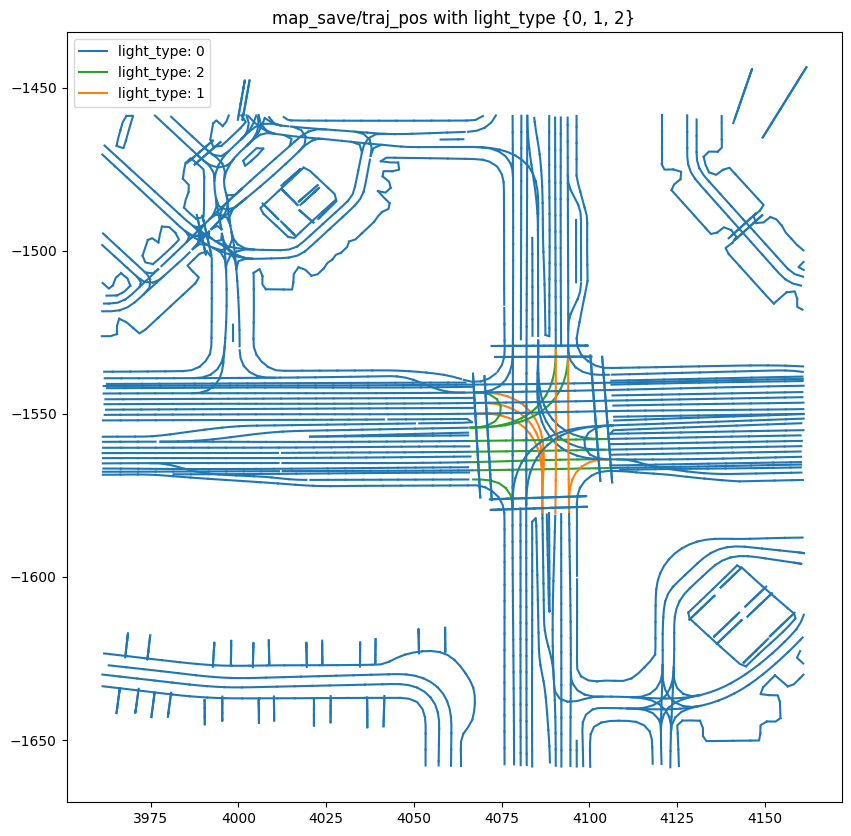

In [9]:
# pt_token:
#   type:
#     Tensor: shape: [3013], dtype: torch.uint8
#   pl_type:
#     Tensor: shape: [3013], dtype: torch.uint8
#   light_type:
#     Tensor: shape: [3013], dtype: torch.uint8
#   num_nodes: <class 'int'> - 3013
#     <class 'int'> - 3013

from asim.common.visualization.matplotlib.utils import add_non_repeating_legend_to_ax


fig, ax = plt.subplots(figsize=(10, 10))
traj_pos = data["map_save"]["traj_pos"].numpy()
type = data["pt_token"]["type"].numpy()
for i in range(traj_pos.shape[0]):
    ax.plot(traj_pos[i, :, 0], traj_pos[i, :, 1], color=TAB_10[type[i] % len(TAB_10)].hex, label=f"type: {type[i]}")
ax.set_title(f"map_save/traj_pos with type {set(type.tolist())}")
add_non_repeating_legend_to_ax(ax)
plt.show()


fig, ax = plt.subplots(figsize=(10, 10))
traj_pos = data["map_save"]["traj_pos"].numpy()
pl_type = data["pt_token"]["pl_type"].numpy()
for i in range(traj_pos.shape[0]):
    ax.plot(traj_pos[i, :, 0], traj_pos[i, :, 1], color=TAB_10[pl_type[i] % len(TAB_10)].hex, label=f"pl_type: {pl_type[i]}")
ax.set_title(f"map_save/traj_pos with pl_type {set(pl_type.tolist())}")
add_non_repeating_legend_to_ax(ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
traj_pos = data["map_save"]["traj_pos"].numpy()
light_type = data["pt_token"]["light_type"].numpy()
for i in range(traj_pos.shape[0]):
    ax.plot(traj_pos[i, :, 0], traj_pos[i, :, 1], color=TAB_10[light_type[i] % len(TAB_10)].hex, label=f"light_type: {light_type[i]}")
ax.set_title(f"map_save/traj_pos with light_type {set(light_type.tolist())}")
add_non_repeating_legend_to_ax(ax)
plt.show()

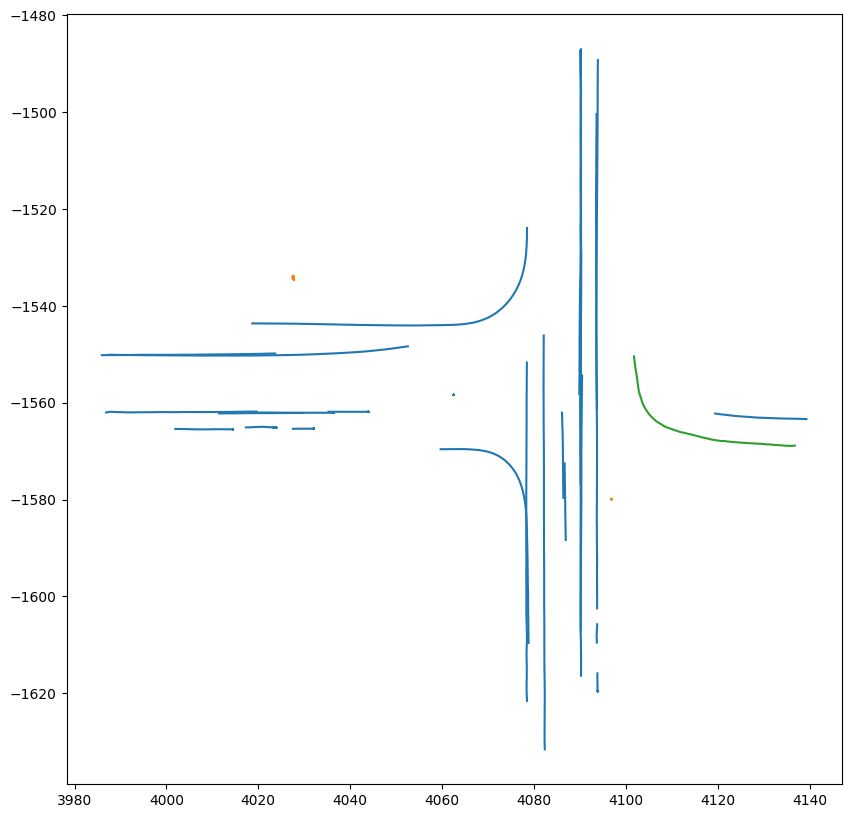

In [31]:
# agent:
#   num_nodes: <class 'int'> - 48
#     <class 'int'> - 48
#   valid_mask:
#     Tensor: shape: [48, 91], dtype: torch.bool
#   role:
#     Tensor: shape: [48, 3], dtype: torch.bool
#   id:
#     Tensor: shape: [48], dtype: torch.int64
#   type:
#     Tensor: shape: [48], dtype: torch.uint8
#   position:
#     Tensor: shape: [48, 91, 3], dtype: torch.float32
#   heading:
#     Tensor: shape: [48, 91], dtype: torch.float32
#   velocity:
#     Tensor: shape: [48, 91, 2], dtype: torch.float32
#   shape:
#     Tensor: shape: [48, 3], dtype: torch.float32

num_nodes = data["agent"]["num_nodes"]
valid_mask = data["agent"]["valid_mask"].numpy()
role = data["agent"]["role"].numpy().argmax(axis=-1)
id = data["agent"]["id"].numpy()
type = data["agent"]["type"].numpy()
position = data["agent"]["position"].numpy()
heading = data["agent"]["heading"].numpy()
velocity = data["agent"]["velocity"].numpy()
shape = data["agent"]["shape"].numpy()


fig, ax = plt.subplots(figsize=(10, 10))
for i in range(num_nodes):
    # if not valid_mask[i].any():
    #     continue

    position_mask = valid_mask[i].nonzero()[0]
    ax.plot(
        position[i, position_mask, 0],
        position[i, position_mask, 1],
        color=TAB_10[type[i] % len(TAB_10)].hex,
        label=f"type: {type[i]}, id: {id[i]}, role: {role[i]}",
    )